In [2]:
from data_analysis_codes import param
from data_analysis_codes.tools import PlottingTools as RPlot


pA = param.pflrw_d3e2_L1206_t1_N128_zc0()
pB = param.pflrw_d1e7_L1821_t1_N16()
pC  = param.pflrw_d1e7_L1821_t1_N32()
pD  = param.pflrw_A0_L1821_t1_N16()
pdA = RPlot.getdata(pA)
pdB = RPlot.getdata(pB)
pdC = RPlot.getdata(pC)
pdD = RPlot.getdata(pD)

In [3]:
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
import numpy as np
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData

/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


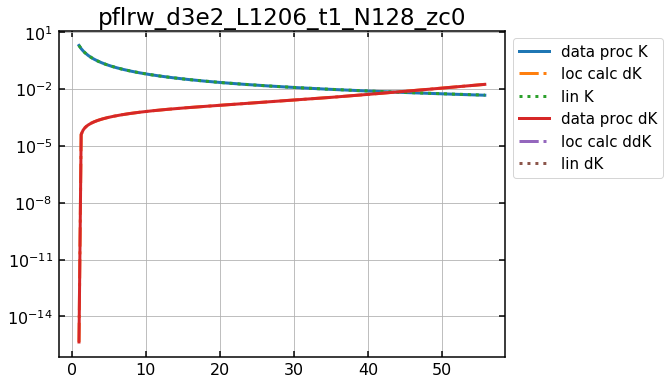

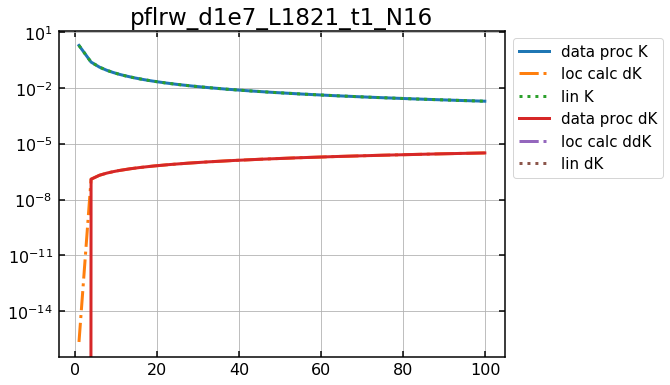

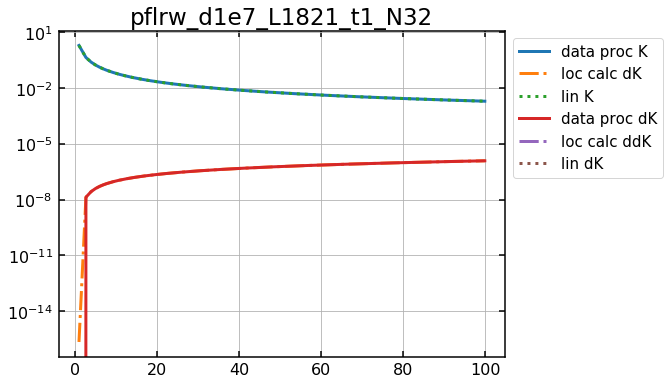

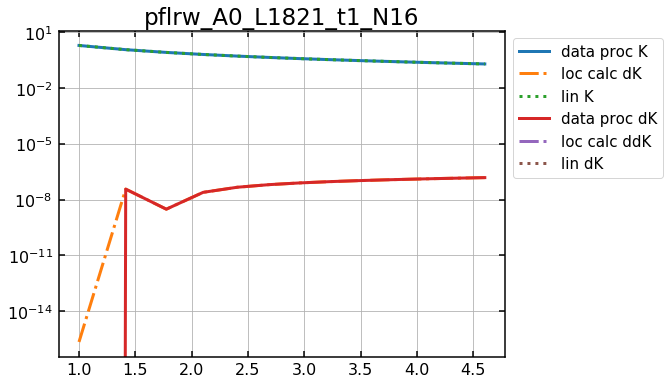

In [7]:
# Background

PD = [{'p':pA, 'pd':pdA}, {'p':pB, 'pd':pdB}, {'p':pC, 'pd':pdC}, {'p':pD, 'pd':pdD}]

for P in PD:
    plt.figure()
    Lin = LinData.LinData_Class(P['p'], '/home/robynm/simulations/'+P['p'].sim_name+'/')
    t = P['pd']['t']
    
    l = 'OD'
    #t = 5
    #print(isinstance(t, (int, float)), np.sum(t==P['p'].t_initial)!=0, t==P['p'].t_initial)
    x = Lin.a(t)
    #GOOD: Lin.K(t), Lin.rho(t)
    Y = [Lin.K(t), Lin.dK(t, loc='cent')]#, Lin.rho(t), Lin.drho(t, loc=l)]#, 
    #     Lin.dgdet(t, loc=l), Lin.dRicciS(t, loc=l)]#, Lin.gdet(t)Lin.dDa(t, loc=l), , Lin.dZa(t, loc=l)
    var = ['K', 'dK']#, 'rho', 'drho']#, 'dgdet', 'dRicciS']
    for i, y in enumerate(Y):
        try:
            plt.semilogy(x/x[0], abs(P['pd'][var[i]+'_cent']), label='data proc '+var[i])
            plt.semilogy(x/x[0], abs(P['pd'][var[i]+'_cent']/y-1), label='loc calc d'+var[i], linestyle='-.')
        except:
            pass
        plt.semilogy(x/x[0], abs(y), label='lin '+var[i], linestyle=':')
    plt.grid()
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)
    plt.title(P['p'].sim_name)
    #plt.ylim(1e-8, 1e-6)